In [1]:
import pandas as pd
import numpy as np

# read in data and show first rows
trainoutliers = pd.read_csv("originaltrain.csv")
trainoutliers.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,labels
0,-0.276515,-0.424429,1.344997,-0.012283,0.076230,1.076648,0.182198,3,0,1,0,0,0,0,10,2,1
1,0.853573,0.150991,0.503892,-0.979179,-0.569351,-0.411453,-0.251940,4,1,2,0,1,0,0,0,3,0
2,0.947747,-0.173832,1.825628,-0.703478,0.076230,-0.411453,-0.251940,6,1,2,0,0,0,0,5,3,0
3,0.853573,-0.381404,0.984523,-0.039464,-0.569351,-0.411453,-0.251940,4,0,2,0,1,0,0,5,3,0
4,1.324443,1.590527,-1.178318,-0.097711,-0.246560,-0.411453,-0.251940,0,1,1,0,0,0,0,8,3,0


In [2]:
# describe the data with basic statistics
trainoutliers.describe()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,labels
count,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000
mean,-0.004158,0.002584,-0.000213,-0.000053,-0.000298,-0.004652,-0.007498,4.336381,1.171051,1.225345,0.018137,0.555503,0.159667,0.639407,5.520497,2.562375,0.116993
std,0.999776,1.014268,1.000872,1.002512,1.003724,0.993984,0.802696,3.273376,0.606730,0.749104,0.133450,0.496917,0.366303,0.897627,3.003241,0.987148,0.321417
min,-2.159994,-3.081149,-1.779108,-1.002478,-0.569351,-0.411453,-0.251940,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.747384,-0.422787,-0.938003,-0.602517,-0.569351,-0.411453,-0.251940,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,0.000000
50%,-0.182341,-0.297324,0.023260,-0.303517,-0.246560,-0.411453,-0.251940,4.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,6.000000,3.000000,0.000000
75%,0.665225,0.022901,0.624050,0.236237,0.076230,-0.411453,-0.251940,7.000000,2.000000,2.000000,0.000000,1.000000,0.000000,2.000000,8.000000,3.000000,0.000000
max,5.091402,33.094776,1.825628,18.094700,19.443647,8.127648,23.625644,11.000000,2.000000,3.000000,1.000000,1.000000,1.000000,2.000000,11.000000,3.000000,1.000000


In [3]:
# check for null values
trainoutliers.isnull().sum()

feature_0     0
feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
feature_14    0
feature_15    0
labels        0
dtype: int64

In [4]:
# use pandas profiling for basic statistics, correlations, and other basic metrics
from pandas_profiling import ProfileReport
profile = ProfileReport(trainoutliers)
profile.to_file(output_file = "originalchurn.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
#create a function to find outliers using IQR

def IQRoutliers(trainoutliers):

    quant1=trainoutliers.quantile(0.25)

    quant3=trainoutliers.quantile(0.75)

    IQR=quant3-quant1

    outliers = trainoutliers[((trainoutliers<(quant1-1.5*IQR)) | (trainoutliers>(quant3+1.5*IQR)))]

    return outliers




In [6]:
# creating a min/max outlier to easily know where replacing outliers with median will occur and also validate that code is correctly lining up with features.
outliers0 = IQRoutliers(trainoutliers["feature_0"])


print("max outlier value: "+ str(outliers0.max()))
print("min outlier value: "+ str(outliers0.min()))
print("number of outliers: "+ str(len(outliers0)))
print(trainoutliers["feature_0"].median())


max outlier value: 5.09140213258684
min outlier value: 2.831226668260275
number of outliers: 368
-0.1823406175084774


In [7]:
outliers1 = IQRoutliers(trainoutliers["feature_1"])

print("number of outliers: "+ str(len(outliers1)))

print("max outlier value: "+ str(outliers1.max()))

print("min outlier value: "+ str(outliers1.min()))

number of outliers: 3537
max outlier value: 33.09477575528038
min outlier value: -3.0811485466035458


In [8]:
outliers2 = IQRoutliers(trainoutliers["feature_2"])

print("number of outliers: "+ str(len(outliers2)))

print("max outlier value: "+ str(outliers2.max()))

print("min outlier value: "+ str(outliers2.min()))

number of outliers: 0
max outlier value: nan
min outlier value: nan


In [9]:
outliers3 = IQRoutliers(trainoutliers["feature_3"])

print("number of outliers: "+ str(len(outliers3)))

print("max outlier value: "+ str(outliers3.max()))

print("min outlier value: "+ str(outliers3.min()))

number of outliers: 2429
max outlier value: 18.094699808975527
min outlier value: 1.4943674351673266


In [10]:
outliers4 = IQRoutliers(trainoutliers["feature_4"])

print("number of outliers: "+ str(len(outliers4)))

print("max outlier value: "+ str(outliers4.max()))

print("min outlier value: "+ str(outliers4.min()))

number of outliers: 2301
max outlier value: 19.443647344339787
min outlier value: 1.367391102546362


In [11]:
outliers5 = IQRoutliers(trainoutliers["feature_5"])

print("number of outliers: "+ str(len(outliers5)))

print("max outlier value: "+ str(outliers5.max()))

print("min outlier value: "+ str(outliers5.min()))

number of outliers: 6156
max outlier value: 8.127647701786206
min outlier value: -0.3914786016783596


In [12]:
outliers6 = IQRoutliers(trainoutliers["feature_6"])

print("number of outliers: "+ str(len(outliers6)))

print("max outlier value: "+ str(outliers6.max()))

print("min outlier value: "+ str(outliers6.min()))

number of outliers: 6156
max outlier value: 23.6256441632028
min outlier value: 0.182197529943736


In [13]:
outliers7 = IQRoutliers(trainoutliers["feature_7"])

print("number of outliers: "+ str(len(outliers7)))

print("max outlier value: "+ str(outliers7.max()))

print("min outlier value: "+ str(outliers7.min()))

number of outliers: 0
max outlier value: nan
min outlier value: nan


In [14]:
outliers8 = IQRoutliers(trainoutliers["feature_8"])

print("number of outliers: "+ str(len(outliers8)))

print("max outlier value: "+ str(outliers8.max()))

print("min outlier value: "+ str(outliers8.min()))

number of outliers: 0
max outlier value: nan
min outlier value: nan


In [15]:
outliers9 = IQRoutliers(trainoutliers["feature_9"])

print("number of outliers: "+ str(len(outliers9)))

print("max outlier value: "+ str(outliers9.max()))

print("min outlier value: "+ str(outliers9.min()))

number of outliers: 0
max outlier value: nan
min outlier value: nan


In [16]:
outliers10 = IQRoutliers(trainoutliers["feature_10"])

print("number of outliers: "+ str(len(outliers10)))

print("max outlier value: "+ str(outliers10.max()))

print("min outlier value: "+ str(outliers10.min()))

number of outliers: 615
max outlier value: 1
min outlier value: 1


In [17]:
outliers11 = IQRoutliers(trainoutliers["feature_11"])

print("number of outliers: "+ str(len(outliers11)))

print("max outlier value: "+ str(outliers11.max()))

print("min outlier value: "+ str(outliers11.min()))

number of outliers: 0
max outlier value: nan
min outlier value: nan


In [18]:
outliers12 = IQRoutliers(trainoutliers["feature_12"])

print("number of outliers: "+ str(len(outliers12)))

print("max outlier value: "+ str(outliers12.max()))

print("min outlier value: "+ str(outliers12.min()))

number of outliers: 5414
max outlier value: 1
min outlier value: 1


In [19]:
outliers13 = IQRoutliers(trainoutliers["feature_13"])

print("number of outliers: "+ str(len(outliers13)))

print("max outlier value: "+ str(outliers13.max()))

print("min outlier value: "+ str(outliers13.min()))

number of outliers: 0
max outlier value: nan
min outlier value: nan


In [20]:
outliers14 = IQRoutliers(trainoutliers["feature_14"])

print("number of outliers: "+ str(len(outliers14)))

print("max outlier value: "+ str(outliers14.max()))

print("min outlier value: "+ str(outliers14.min()))

number of outliers: 0
max outlier value: nan
min outlier value: nan


In [21]:
outliers15 = IQRoutliers(trainoutliers["feature_15"])

print("number of outliers: "+ str(len(outliers15)))

print("max outlier value: "+ str(outliers15.max()))

print("min outlier value: "+ str(outliers15.min()))

number of outliers: 6152
max outlier value: 2
min outlier value: 0


In [22]:
# get all medians for the values that will need to be replaced
print(trainoutliers.median())

feature_0    -0.182341
feature_1    -0.297324
feature_2     0.023260
feature_3    -0.303517
feature_4    -0.246560
feature_5    -0.411453
feature_6    -0.251940
feature_7     4.000000
feature_8     1.000000
feature_9     1.000000
feature_10    0.000000
feature_11    1.000000
feature_12    0.000000
feature_13    0.000000
feature_14    6.000000
feature_15    3.000000
labels        0.000000
dtype: float64


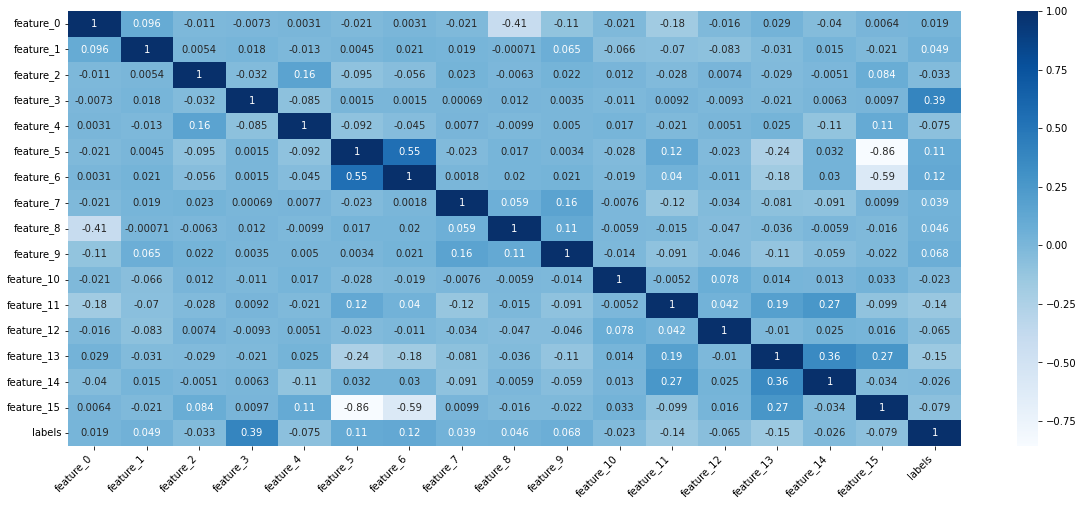

In [23]:
# correlation chart to understand most influential features

import sklearn.datasets 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


plt.figure(figsize=(20,8))
corr = trainoutliers.corr()
ax = sns.heatmap(
    corr, annot=True, cmap=plt.cm.Blues 
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

<AxesSubplot:>

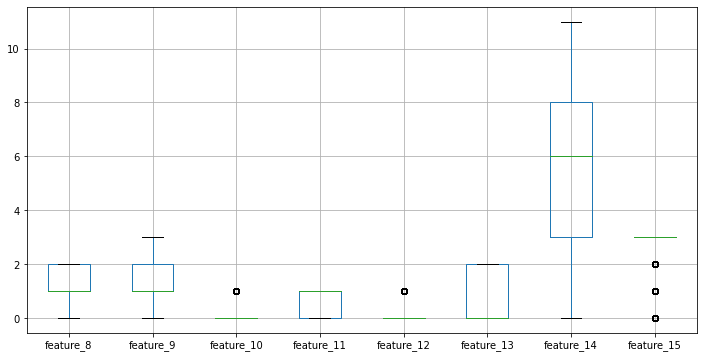

In [24]:
# box plots to show outliers in visual form
plt.figure(figsize=(12,6))
trainoutliers.boxplot(column=['feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 
                                   'feature_13', 'feature_14', 'feature_15'])



<AxesSubplot:>

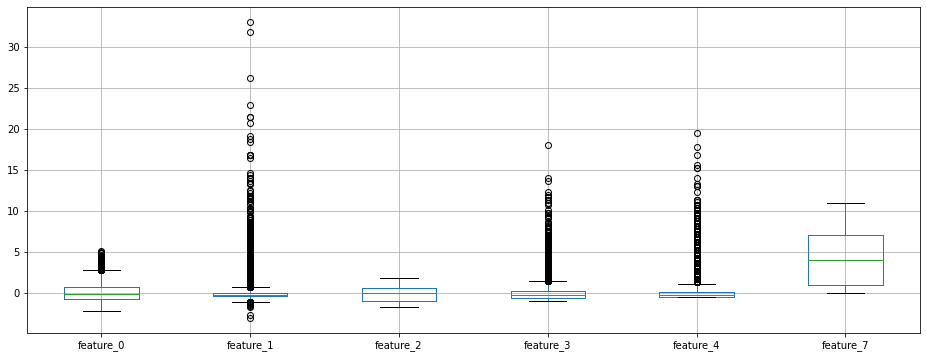

In [25]:
plt.figure(figsize=(16,6))
trainoutliers.boxplot(column=['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_7'])

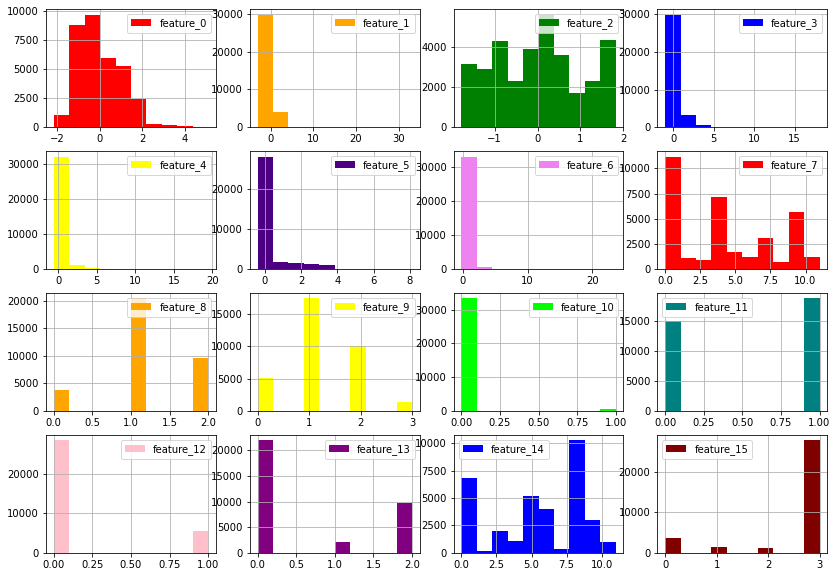

In [26]:
# histograms to visualize skew and mode

plt.figure(figsize=(14,10))
clr=['red','orange','green','blue','yellow','indigo','violet','red','orange','yellow','lime','teal','pink','purple','blue','maroon']
for i,j in zip(range(1,17),trainoutliers.columns[:-1]):
    plt.subplot(4,4,i)
    trainoutliers[j].hist(color = clr[i-1], label=j)
    plt.legend()

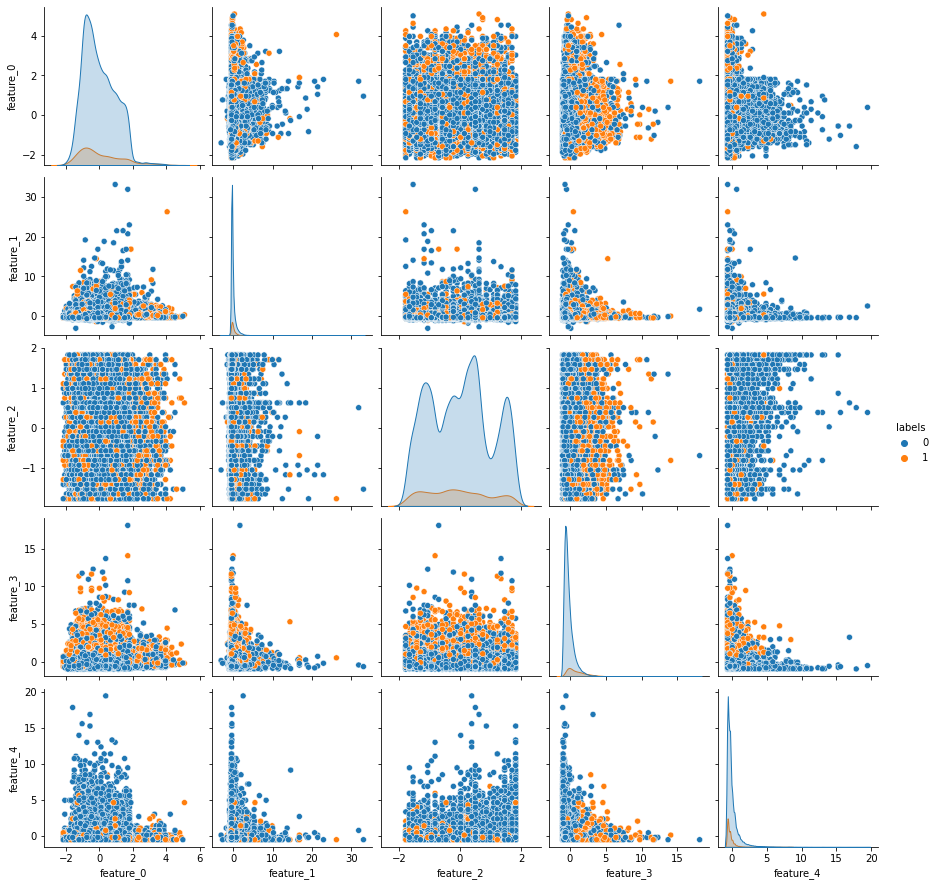

In [27]:
# pair plot to understand relationships between featuers
sns.pairplot(data=trainoutliers[['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'labels']], hue='labels', diag_kind='kde')

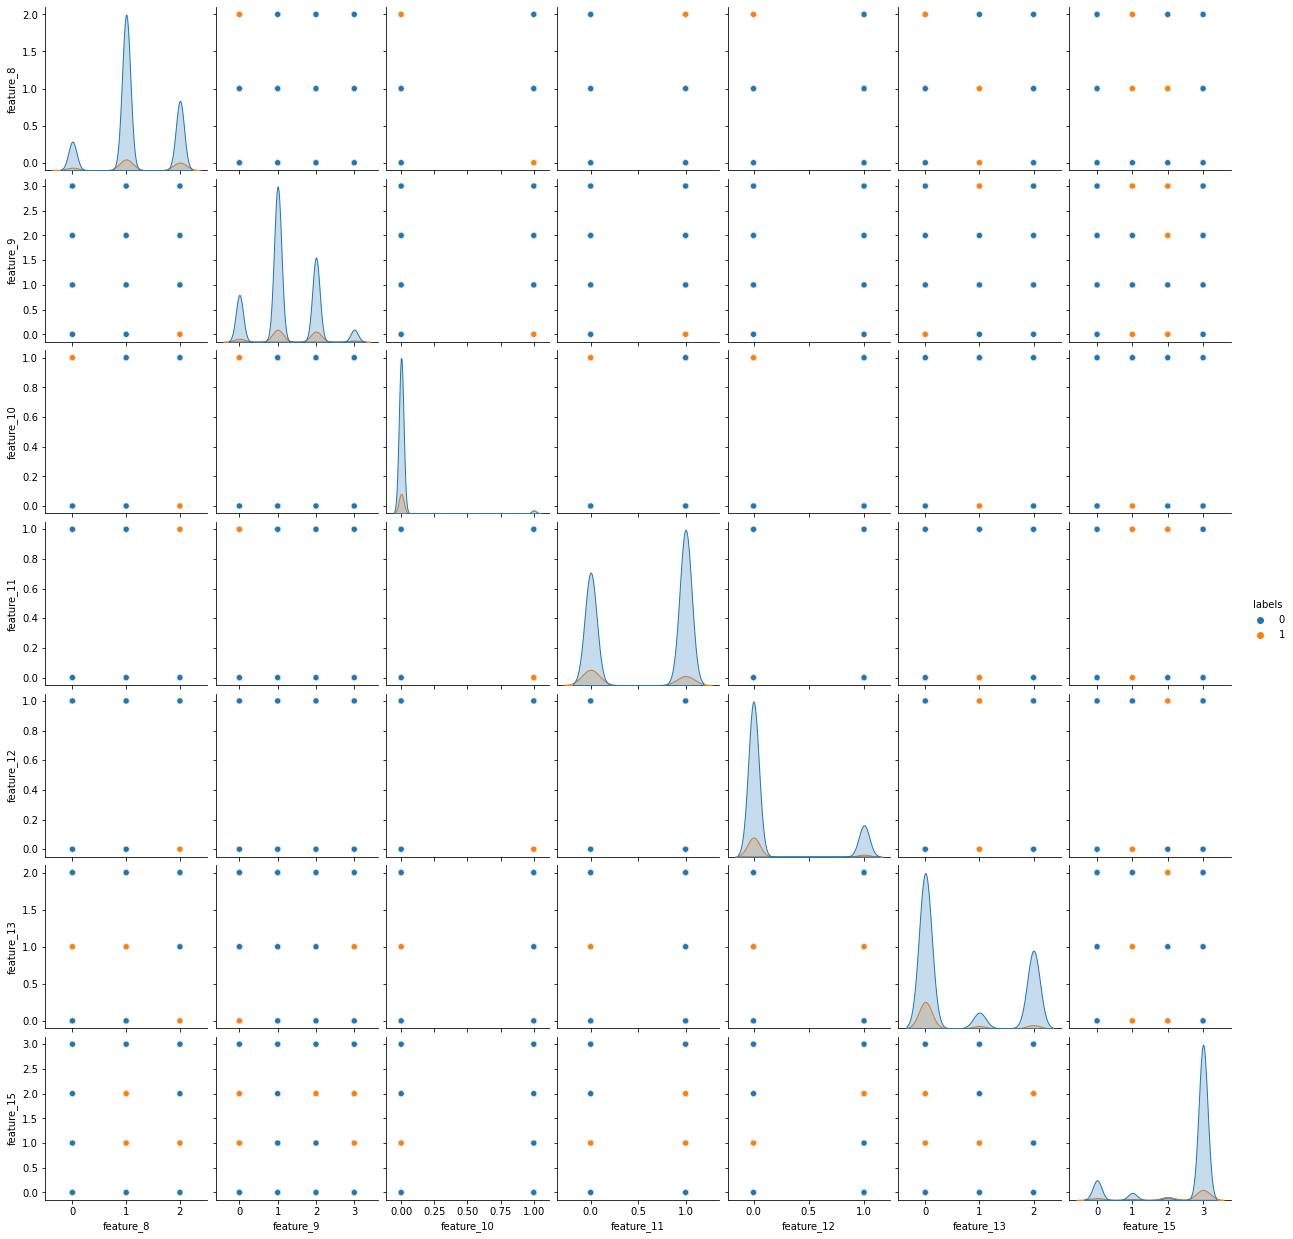

In [28]:
sns.pairplot(data=trainoutliers[['feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_15', 'labels']], hue='labels', diag_kind='kde')

In [29]:
# dropping features that will no longer be used due to correlation issues
trainoutliers.drop('feature_5', inplace=True, axis=1)

In [30]:
trainoutliers.drop('feature_6', inplace=True, axis=1)

In [31]:
trainoutliers.drop('feature_7', inplace=True, axis=1)

In [32]:
trainoutliers.drop('feature_14', inplace=True, axis=1)

In [33]:
# verifying features were dropped
trainoutliers.columns

Index(['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12',
       'feature_13', 'feature_15', 'labels'],
      dtype='object')

In [34]:
# using ANOVA method to determine top features to keep

from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

 
X = trainoutliers
y=trainoutliers["labels"]
test=SelectKBest(score_func=f_classif, k=6)
fit = test.fit(X,y)
set_printoptions(precision=10)

features = fit.transform(X)
ANOVA_features_for_training = test.fit_transform(X,y)
ANOVA_support = test.get_support()
ANOVA_feature = X.loc[:,ANOVA_support].columns.tolist()
print("The Dataset features are: ", X.shape[1])
print('The selected features with ANOVA(Filter Method are', len(ANOVA_feature))
print("They are: ")
print(ANOVA_feature)

The Dataset features are:  13
The selected features with ANOVA(Filter Method are 6
They are: 
['feature_3', 'feature_4', 'feature_11', 'feature_13', 'feature_15', 'labels']


C:\Users\13158\miniconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\13158\miniconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


[0.0141468309 0.021215001  0.0057674811 0.0707740663 0.0058346953
 0.0032857603 0.0043708424 0.           0.0104901446 0.0040236653
 0.0145207638 0.0346836119 0.3609939301]


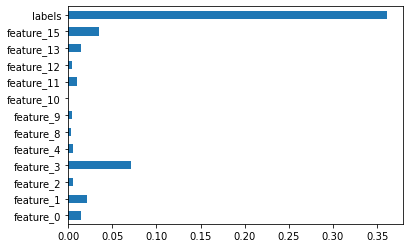

In [35]:
# verifying features to keep with mutual_info_classif
from sklearn.feature_selection import mutual_info_classif

res = mutual_info_classif(X,y)
feat_importance = pd.Series(res, trainoutliers.columns[0:len(trainoutliers.columns)])
feat_importance.plot(kind ='barh')
print(res)

<AxesSubplot:xlabel='feature_3'>

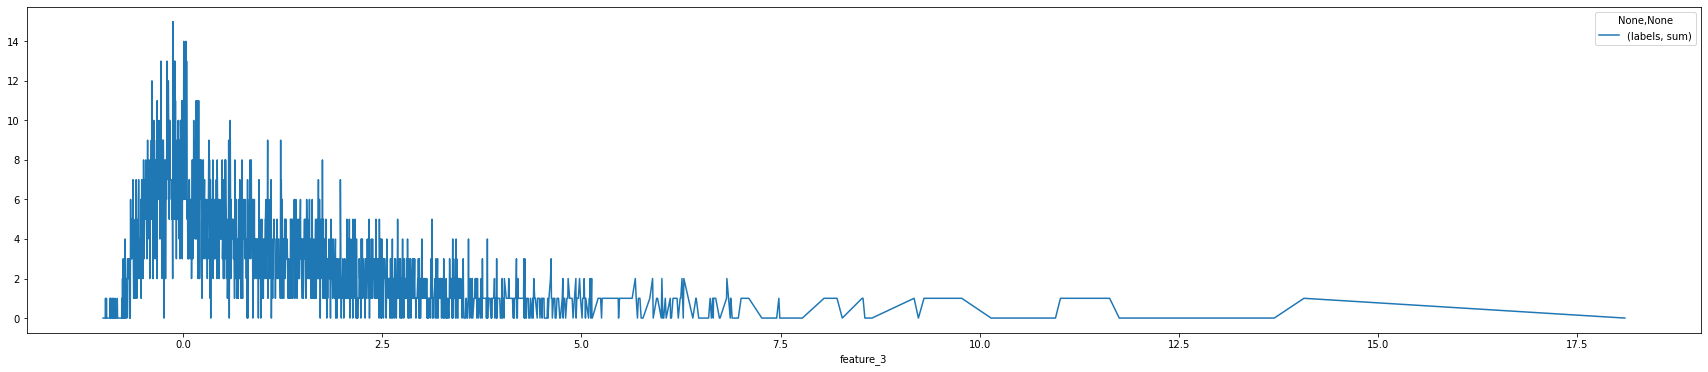

In [36]:
# understanding direct relationship and insight between features being kept and churn
trainoutliers.groupby('feature_3').agg({'labels':[sum]}).plot(figsize=(30,6))

<AxesSubplot:xlabel='feature_4'>

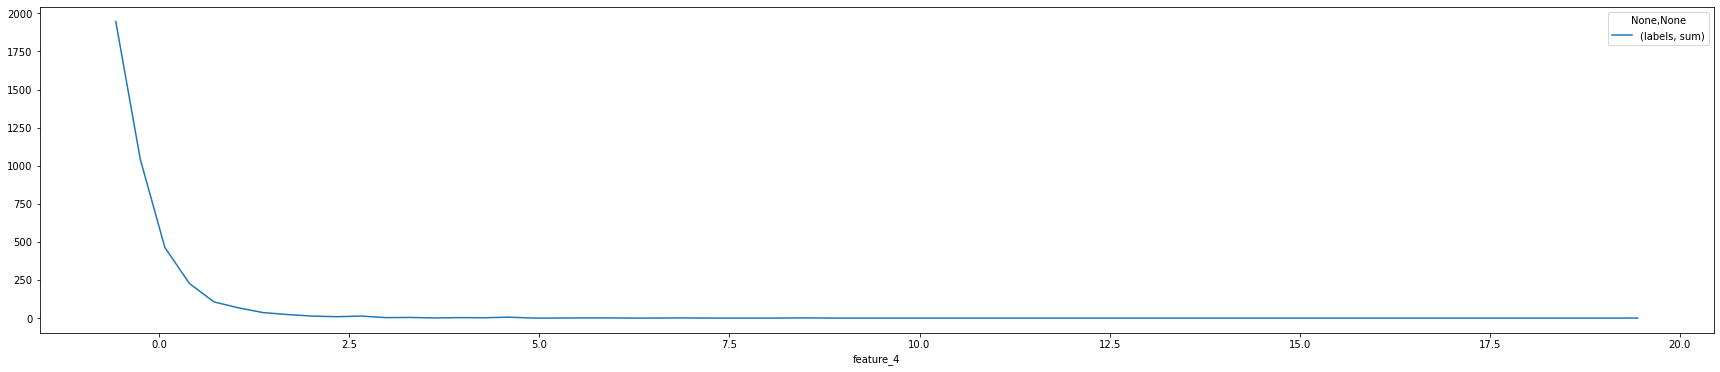

In [37]:
trainoutliers.groupby('feature_4').agg({'labels':[sum]}).plot(figsize=(30,6))

<AxesSubplot:xlabel='feature_11'>

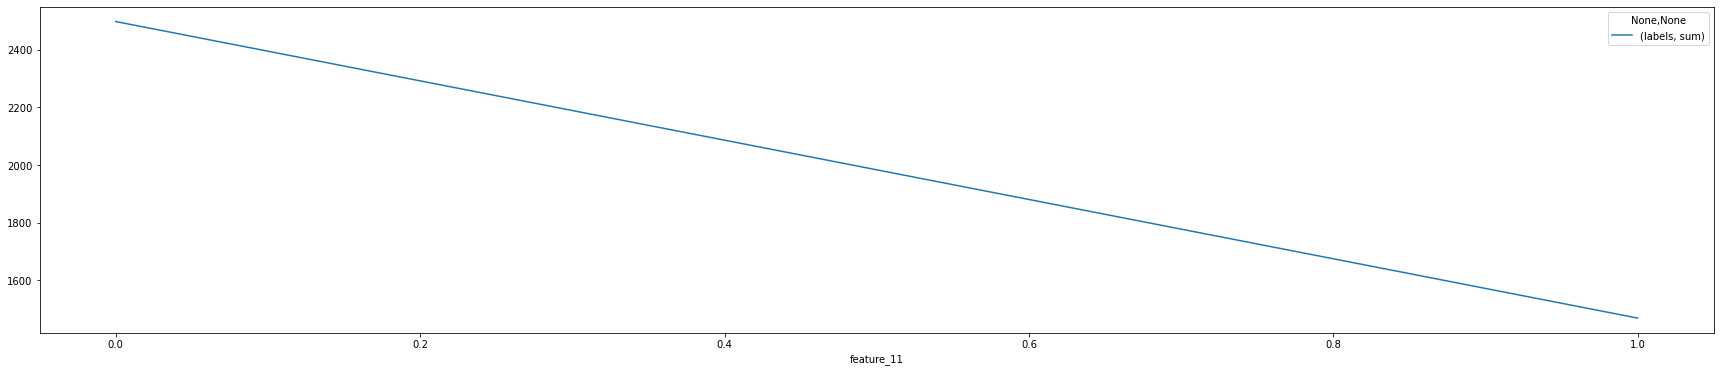

In [38]:
trainoutliers.groupby('feature_11').agg({'labels':[sum]}).plot(figsize=(30,6))

<AxesSubplot:xlabel='feature_13'>

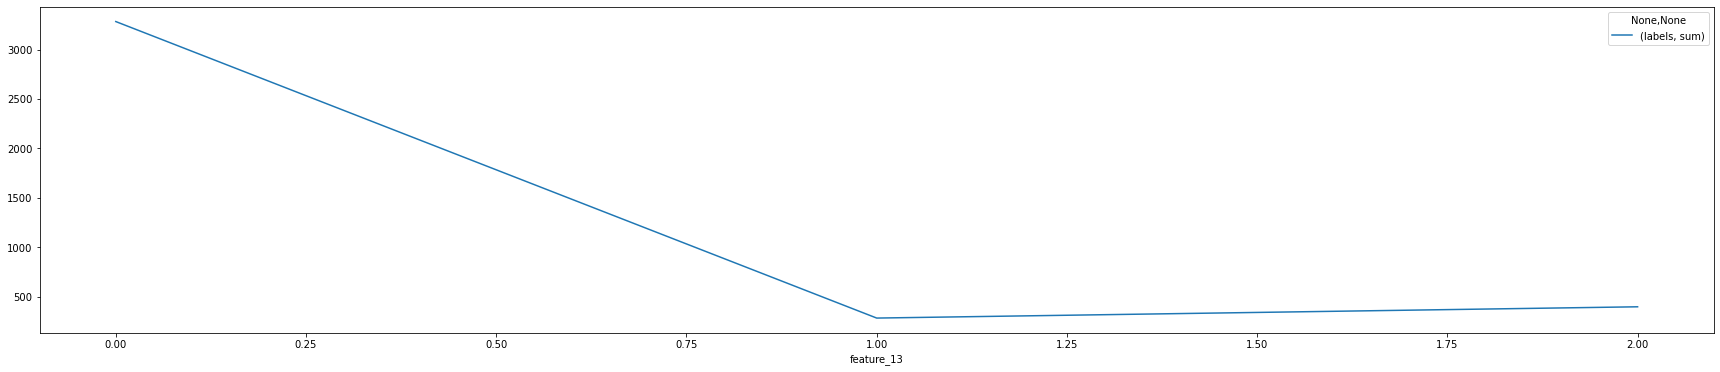

In [39]:
trainoutliers.groupby('feature_13').agg({'labels':[sum]}).plot(figsize=(30,6))

<AxesSubplot:xlabel='feature_15'>

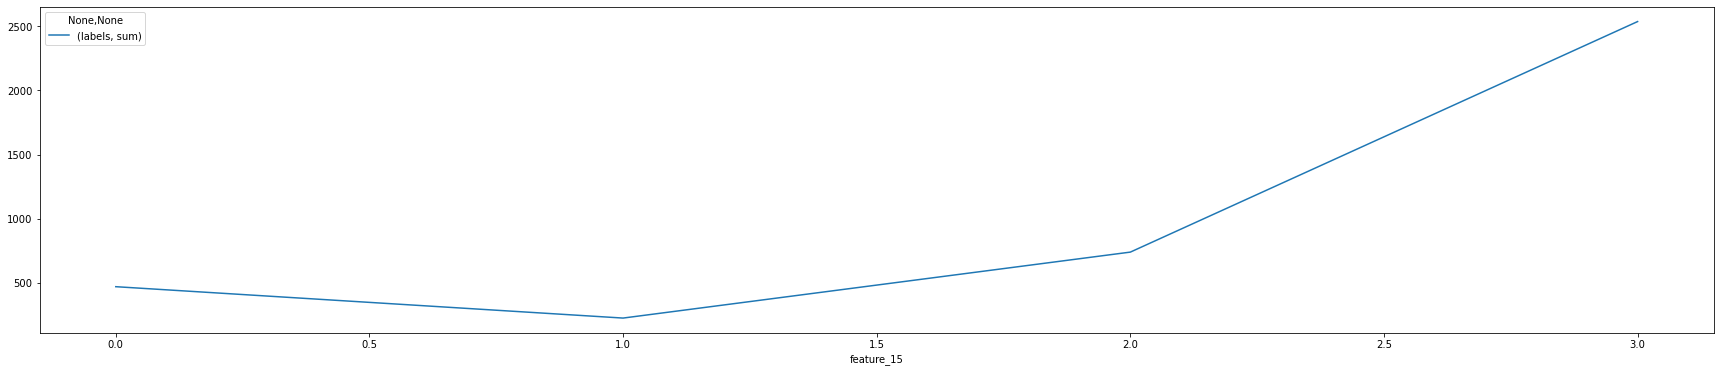

In [40]:
trainoutliers.groupby('feature_15').agg({'labels':[sum]}).plot(figsize=(30,6))

<AxesSubplot:xlabel='feature_1'>

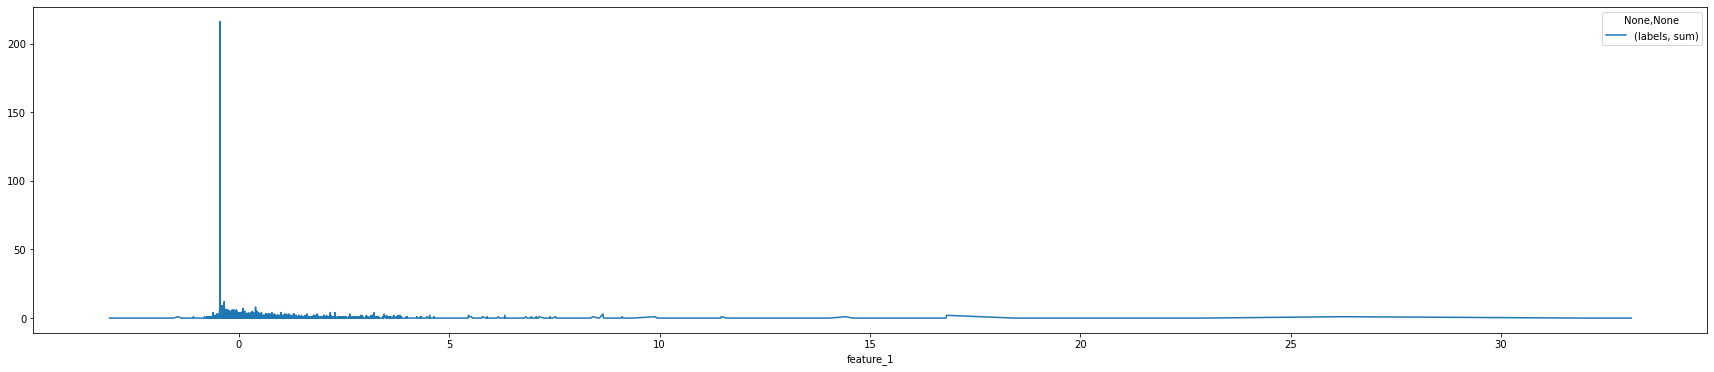

In [41]:
trainoutliers.groupby('feature_1').agg({'labels':[sum]}).plot(figsize=(30,6))

In [42]:
# dropping remaining features
trainoutliers.drop('feature_0', inplace=True, axis=1)
trainoutliers.drop('feature_2', inplace=True, axis=1)
trainoutliers.drop('feature_8', inplace=True, axis=1)
trainoutliers.drop('feature_9', inplace=True, axis=1)
trainoutliers.drop('feature_10', inplace=True, axis=1)
trainoutliers.drop('feature_12', inplace=True, axis=1)

In [43]:
# verifying features were dropped
trainoutliers.columns

Index(['feature_1', 'feature_3', 'feature_4', 'feature_11', 'feature_13',
       'feature_15', 'labels'],
      dtype='object')

<AxesSubplot:xlabel='feature_3', ylabel='Count'>

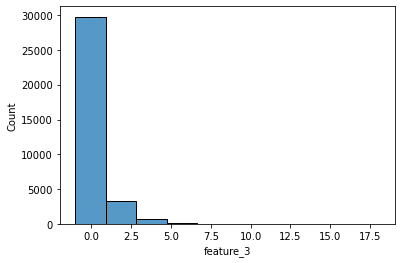

In [44]:
# looking at histogram of each feature kept in larger detail
sns.histplot(trainoutliers.feature_3, bins = 10)

<AxesSubplot:xlabel='feature_4', ylabel='Count'>

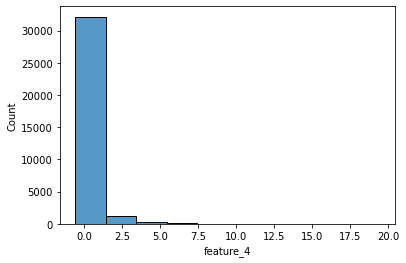

In [45]:
sns.histplot(trainoutliers.feature_4, bins = 10)

<AxesSubplot:xlabel='feature_11', ylabel='Count'>

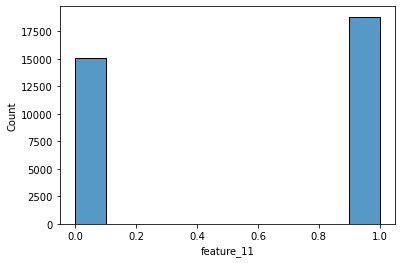

In [46]:
sns.histplot(trainoutliers.feature_11, bins = 10)

<AxesSubplot:xlabel='feature_13', ylabel='Count'>

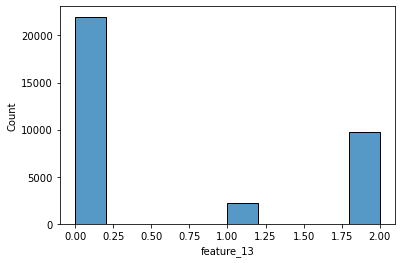

In [47]:
sns.histplot(trainoutliers.feature_13, bins = 10)

<AxesSubplot:xlabel='feature_15', ylabel='Count'>

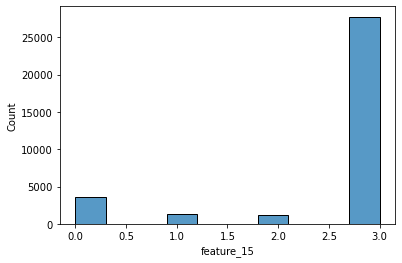

In [48]:
sns.histplot(trainoutliers.feature_15, bins = 10)

Text(0, 0.5, 'labels')

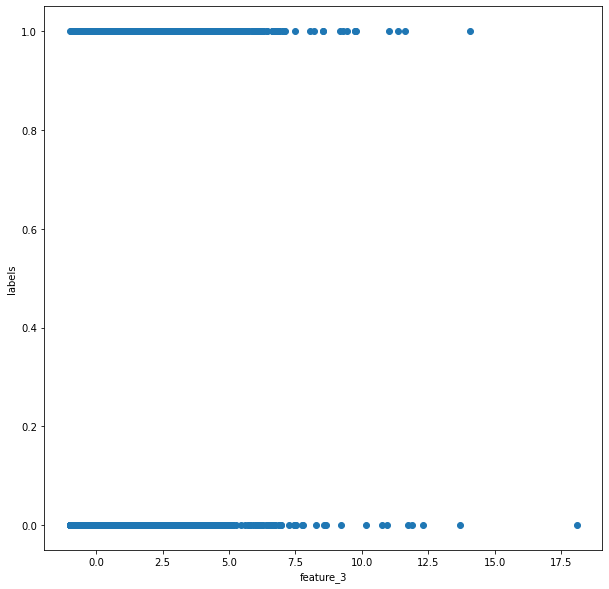

In [49]:
# viewing scatter plot of kept features for any patterns
plt.figure(figsize=(10,10))
plt.scatter(x='feature_3', y='labels', data = trainoutliers)
plt.xlabel('feature_3')
plt.ylabel('labels')

Text(0, 0.5, 'labels')

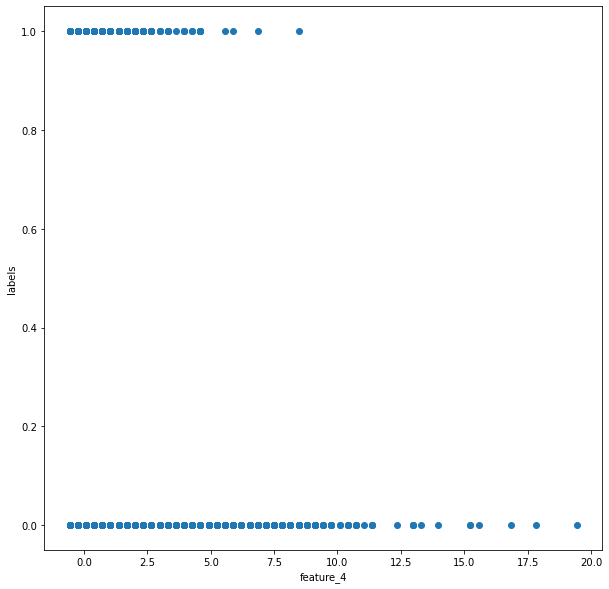

In [50]:
plt.figure(figsize=(10,10))
plt.scatter(x='feature_4', y='labels', data = trainoutliers)
plt.xlabel('feature_4')
plt.ylabel('labels')

Text(0, 0.5, 'labels')

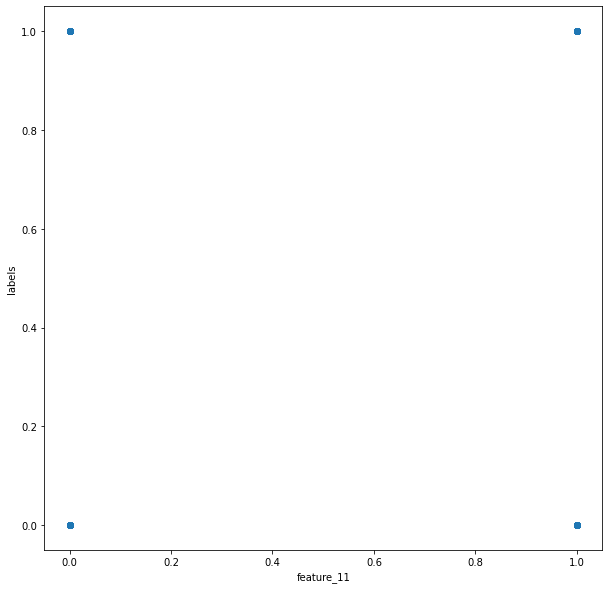

In [51]:
plt.figure(figsize=(10,10))
plt.scatter(x='feature_11', y='labels', data = trainoutliers)
plt.xlabel('feature_11')
plt.ylabel('labels')

Text(0, 0.5, 'labels')

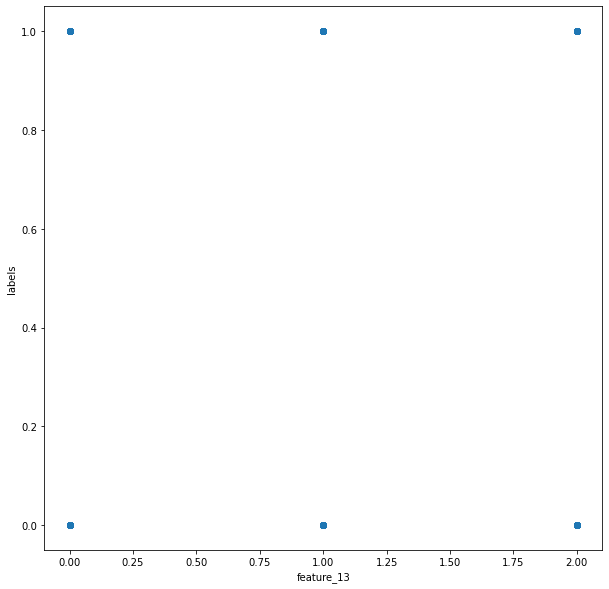

In [52]:
plt.figure(figsize=(10,10))
plt.scatter(x='feature_13', y='labels', data = trainoutliers)
plt.xlabel('feature_13')
plt.ylabel('labels')

Text(0, 0.5, 'labels')

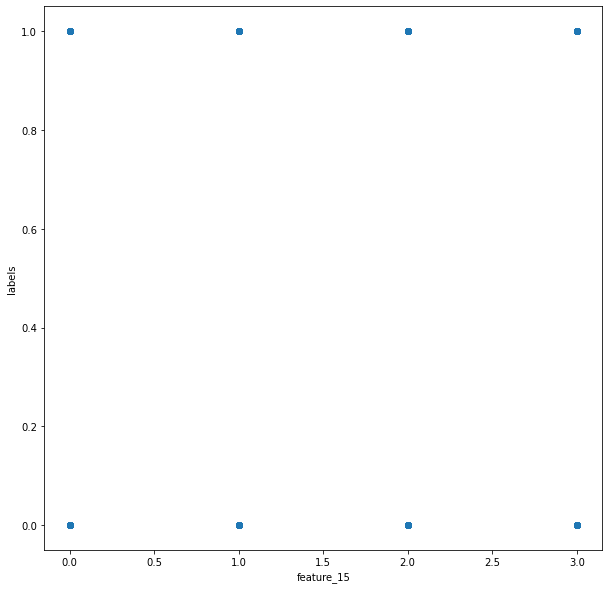

In [53]:
plt.figure(figsize=(10,10))
plt.scatter(x='feature_15', y='labels', data = trainoutliers)
plt.xlabel('feature_15')
plt.ylabel('labels')

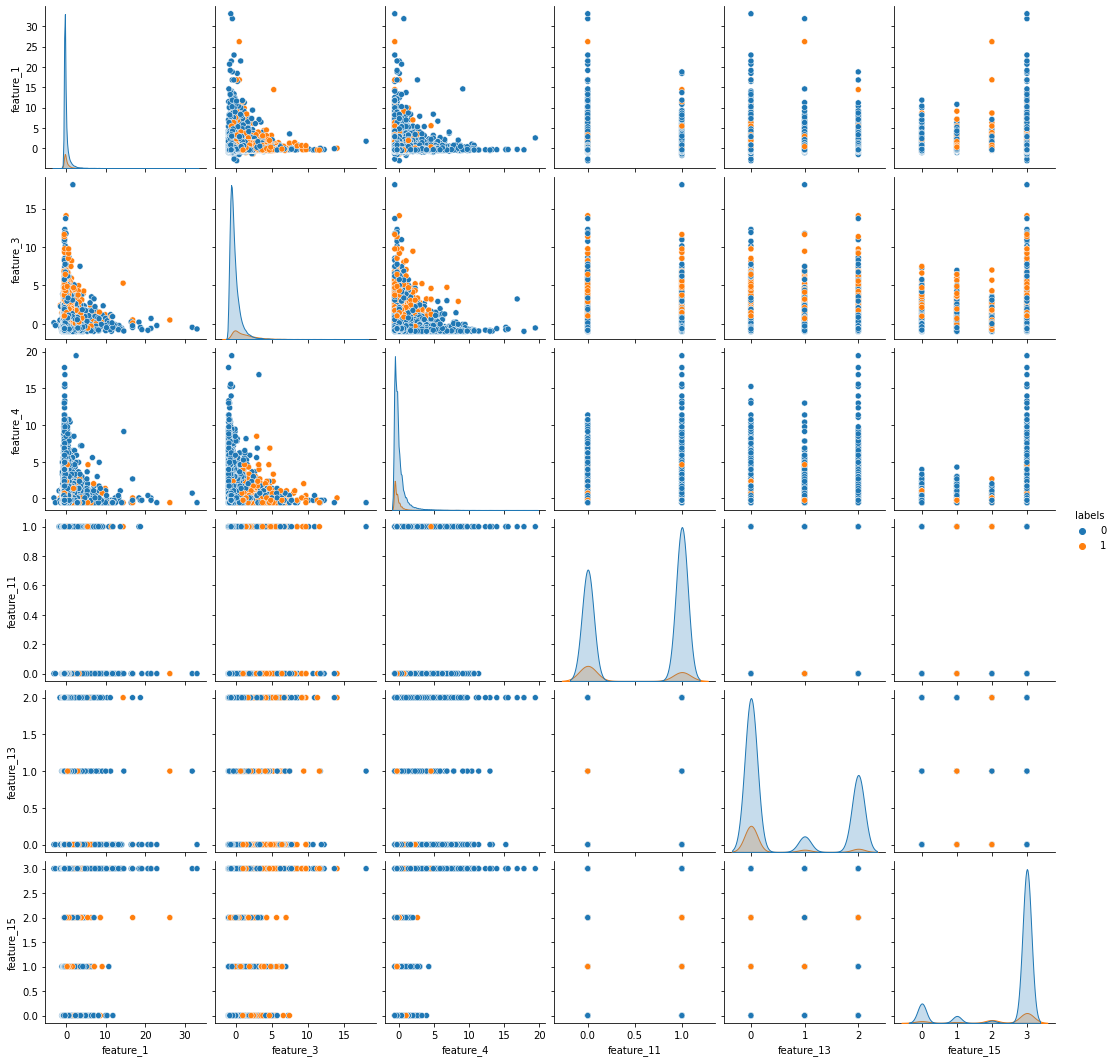

In [54]:
# looking at pair plot of remaining features to see if any special relationship between them
sns.pairplot(data=trainoutliers[['feature_1', 'feature_3', 'feature_4', 'feature_11', 'feature_13', 'feature_15', 'labels']], hue='labels', diag_kind='kde')

In [55]:
# reading test data and deleting columns to match train data
#testdata = pd.read_csv("test.csv")

#testdata.drop('feature_5', inplace=True, axis=1)
#testdata.drop('feature_6', inplace=True, axis=1)
#testdata.drop('feature_7', inplace=True, axis=1)
#testdata.drop('feature_14', inplace=True, axis=1)
#testdata.drop('feature_0', inplace=True, axis=1)
#testdata.drop('feature_2', inplace=True, axis=1)
#testdata.drop('feature_8', inplace=True, axis=1)
#testdata.drop('feature_9', inplace=True, axis=1)
#testdata.drop('feature_10', inplace=True, axis=1)
#testdata.drop('feature_12', inplace=True, axis=1)

# verifying features were dropped
#testdata.columns


Index(['feature_1', 'feature_3', 'feature_4', 'feature_11', 'feature_13',
       'feature_15'],
      dtype='object')

### Creating models 



In [61]:
# splitting into train/test data

from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
for train_indices, test_indices in splitter.split(trainoutliers, trainoutliers['labels']):
    train_set = trainoutliers.iloc[train_indices]
    test_set = trainoutliers.iloc[test_indices]

#### Train and Evaluate Decision Tree Model

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
  

X = train_set[['feature_1','feature_3', 'feature_4', 'feature_11','feature_13', 'feature_15' ]]
y = train_set['labels']

X_test = test_set[['feature_1','feature_3', 'feature_4', 'feature_11','feature_13', 'feature_15' ]]
y_test = test_set['labels']

tree_model = DecisionTreeClassifier()
tree_model.fit(X,y)

y_pred = tree_model.predict(X)
print('Results for decision tree on training data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y, y_pred))
print('Accuracy is  ', accuracy_score(y, y_pred))
print('Precision is ', precision_score(y, y_pred, average='weighted'))
print('Recall is    ', recall_score(y,y_pred, average='weighted'))
print('F1 is        ', f1_score(y, y_pred, average='weighted'))
print()

y_test_pred = tree_model.predict(X_test)
print('Results for decision tree on test data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y_test, y_test_pred))
print('Accuracy is  ', accuracy_score(y_test, y_test_pred))
print('Precision is ', precision_score(y_test, y_test_pred, average='weighted'))
print('Recall is    ', recall_score(y_test,y_test_pred, average='weighted'))
print('F1 is        ', f1_score(y_test, y_test_pred, average='weighted'))


Results for decision tree on training data
  Default settings
Confusion Matrix
[[23952     0]
 [   11  3163]]
Accuracy is   0.9995944849959448
Precision is  0.9995946711439667
Recall is     0.9995944849959448
F1 is         0.9995941795896299

Results for decision tree on test data
  Default settings
Confusion Matrix
[[5505  484]
 [ 484  309]]
Accuracy is   0.8572692421114716
Precision is  0.8572692421114716
Recall is     0.8572692421114716
F1 is         0.8572692421114716


#### Train and evaluate SVC model 
    

In [62]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
  

X = train_set[['feature_1','feature_3', 'feature_4', 'feature_11','feature_13', 'feature_15' ]]
y = train_set['labels']

X_test = test_set[['feature_1','feature_3', 'feature_4', 'feature_11','feature_13', 'feature_15' ]]
y_test = test_set['labels']

svc_model = SVC()
svc_model.fit(X,y)

y_pred = svc_model.predict(X)
print('Results for svc on training data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y, y_pred))
print('Accuracy is  ', accuracy_score(y, y_pred))
print('Precision is ', precision_score(y, y_pred, average='weighted'))
print('Recall is    ', recall_score(y,y_pred, average='weighted'))
print('F1 is        ', f1_score(y, y_pred, average='weighted'))
print()

y_test_pred = svc_model.predict(X_test)
print('Results for svc on test data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y_test, y_test_pred))
print('Accuracy is  ', accuracy_score(y_test, y_test_pred))
print('Precision is ', precision_score(y_test, y_test_pred, average='weighted'))
print('Recall is    ', recall_score(y_test,y_test_pred, average='weighted'))
print('F1 is        ', f1_score(y_test, y_test_pred, average='weighted'))


Results for svc on training data
  Default settings
Confusion Matrix
[[23553   399]
 [ 2254   920]]
Accuracy is   0.9021971540219715
Precision is  0.8874834431438411
Recall is     0.9021971540219715
F1 is         0.8838305244272922

Results for svc on test data
  Default settings
Confusion Matrix
[[5883  106]
 [ 613  180]]
Accuracy is   0.8939840754939545
Precision is  0.8733315174298342
Recall is     0.8939840754939545
F1 is         0.8712293057887555


### Train and evaluate Random Forest Model 

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score

X = train_set[['feature_1','feature_3', 'feature_4', 'feature_11','feature_13', 'feature_15' ]]
y = train_set['labels']

X_test = test_set[['feature_1','feature_3', 'feature_4', 'feature_11','feature_13', 'feature_15' ]]
y_test = test_set['labels']


rf_model = RandomForestClassifier(criterion = "entropy")
rf_model.fit(X, y)
rf_model.score(X,y)


y_pred = rf_model.predict(X)
print('Results for random forest on training data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y, y_pred))
print('Accuracy is  ', accuracy_score(y, y_pred))
print('Precision is ', precision_score(y, y_pred, average='weighted'))
print('Recall is    ', recall_score(y,y_pred, average='weighted'))
print('F1 is        ', f1_score(y, y_pred, average='weighted'))
print()

y_test_pred = rf_model.predict(X_test)
print('Results for random forest on test data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y_test, y_test_pred))
print('Accuracy is  ', accuracy_score(y_test, y_test_pred))
print('Precision is ', precision_score(y_test, y_test_pred, average='weighted'))
print('Recall is    ', recall_score(y_test,y_test_pred, average='weighted'))
print('F1 is        ', f1_score(y_test, y_test_pred, average='weighted'))


Results for random forest on training data
  Default settings
Confusion Matrix
[[23952     0]
 [   14  3160]]
Accuracy is   0.999483889994839
Precision is  0.9994841914861212
Recall is     0.999483889994839
F1 is         0.9994833950123465

Results for random forest on test data
  Default settings
Confusion Matrix
[[5763  226]
 [ 530  263]]
Accuracy is   0.8885284576820996
Precision is  0.8715871532739524
Recall is     0.8885284576820996
F1 is         0.8766914163263766


### Train and evaluate Logistic Regression Model 

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score

X = train_set[['feature_1','feature_3', 'feature_4', 'feature_11','feature_13', 'feature_15' ]]
y = train_set['labels']

X_test = test_set[['feature_1','feature_3', 'feature_4', 'feature_11','feature_13', 'feature_15' ]]
y_test = test_set['labels']

lr_model = LogisticRegression(solver='liblinear', random_state=0)
lr_model.fit(X,y)

y_pred = lr_model.predict(X)
print('Results for linear regression on training data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y, y_pred))
print('Accuracy is  ', accuracy_score(y, y_pred))
print('Precision is ', precision_score(y, y_pred, average='weighted'))
print('Recall is    ', recall_score(y,y_pred, average='weighted'))
print('F1 is        ', f1_score(y, y_pred, average='weighted'))
print()

y_test_pred = lr_model.predict(X_test)
print('Results for linear regression on test data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y_test, y_test_pred))
print('Accuracy is  ', accuracy_score(y_test, y_test_pred))
print('Precision is ', precision_score(y_test, y_test_pred, average='weighted'))
print('Recall is    ', recall_score(y_test,y_test_pred, average='weighted'))
print('F1 is        ', f1_score(y_test, y_test_pred, average='weighted'))



Results for linear regression on training data
  Default settings
Confusion Matrix
[[23536   416]
 [ 2559   615]]
Accuracy is   0.8903266239032662
Precision is  0.8661973735784361
Recall is     0.8903266239032662
F1 is         0.8647282195264299

Results for linear regression on test data
  Default settings
Confusion Matrix
[[5889  100]
 [ 661  132]]
Accuracy is   0.887791212031849
Precision is  0.8604841563406348
Recall is     0.887791212031849
F1 is         0.8595944529096866


### Train and evaluate XG boost Model 

In [81]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score


X = train_set[['feature_1','feature_3', 'feature_4', 'feature_11','feature_13', 'feature_15' ]]
y = train_set['labels']

X_test = test_set[['feature_1','feature_3', 'feature_4', 'feature_11','feature_13', 'feature_15' ]]
y_test = test_set['labels']

xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=25, max_depth=1, gamma=0)
xgb_model.fit(X,y)

y_pred = xgb_model.predict(X)
print('Results for xgboost on training data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y, y_pred))
print('Accuracy is  ', accuracy_score(y, y_pred))
print('Precision is ', precision_score(y, y_pred, average='weighted'))
print('Recall is    ', recall_score(y,y_pred, average='weighted'))
print('F1 is        ', f1_score(y, y_pred, average='weighted'))
print()

y_test_pred = xgb_model.predict(X_test)
print('Results for xg boost on test data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y_test, y_test_pred))
print('Accuracy is  ', accuracy_score(y_test, y_test_pred))
print('Precision is ', precision_score(y_test, y_test_pred, average='weighted'))
print('Recall is    ', recall_score(y_test,y_test_pred, average='weighted'))
print('F1 is        ', f1_score(y_test, y_test_pred, average='weighted'))

Results for xgboost on training data
  Default settings
Confusion Matrix
[[23952     0]
 [ 3174     0]]
Accuracy is   0.8829904888299049
Precision is  0.7796722033640744
Recall is     0.8829904888299049
F1 is         0.8281212337387479

Results for xg boost on test data
  Default settings
Confusion Matrix
[[5989    0]
 [ 793    0]]
Accuracy is   0.8830728398702448
Precision is  0.7798176405164989
Recall is     0.8830728398702448
F1 is         0.8282394860203424


C:\Users\13158\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\13158\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
